In [78]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 23 16:28:46 2019

@author: Deepak
"""

import GravityMachineTrack
import imp
import msdanalyzer
import pandas as pd
import numpy as np
import os
imp.reload(GravityMachineTrack)
imp.reload(msdanalyzer)

import matplotlib.pyplot as plt
# %matplotlib inline

    
#------------------------------------------------------------------------------------------------------------------------------    
# Define some constants for the data analysis:

minTrackDuration = 60
    
    
# Folder in which to save analysis results
saveFolder = 'C:/Users/deepak/Dropbox/GravityMachine/ExperimentResults/MSD_Analysis'
    
analysis_file = 'C:/Users/deepak/Dropbox/GravityMachine/GravityMachineAnalysis_Scripts/AnalyzeTracks.csv'

analysis_df = pd.read_csv(analysis_file)


pairwise_conditions = [(x,y) for x in analysis_df['Organism'] for y in analysis_df['Condition']]


# Create unique pairs between the Organism and Condition columns
used = set()
unique_conditions = [x for x in pairwise_conditions if x not in used and (used.add(x) or True)]
print(50*'-')
print('Unique condition : {}'.format(unique_conditions))
print(50*'-')

ensemble_tracks = []
TrackArray = []

nUniqueConditions = len(unique_conditions)

# Assemble the list of unique conditions i.e unique combinations of Organisms, Condition. Each Unique Condition will in general have several tracks

OrgDims = []

for ii in range(nUniqueConditions):
    
    curr_Organism = unique_conditions[ii][0]
    curr_Condition = unique_conditions[ii][1]
    
    bool_Org = analysis_df['Organism'] == curr_Organism
    bool_Cond = analysis_df['Condition'] == curr_Condition
    
    
    # Check if the analysis data is already present on disk for this Organism, Condition
    if(not os.path.exists(os.path.join(saveFolder, curr_Organism+'_'+curr_Condition+'_MSD.csv')) or not os.path.exists(os.path.join(saveFolder, curr_Organism+'_'+curr_Condition))):
        
        tracks_sameCondition = analysis_df[bool_Org & bool_Cond]
        
        nTracksSameCondition = len(tracks_sameCondition)
        
        for jj in range(nTracksSameCondition):
            
            Track_df = tracks_sameCondition.iloc[jj]
            
            
            
            print(Track_df)
            
            full_path = os.path.join(Track_df['rootFolder'],Track_df['trackFolder'], Track_df['trackFile'])
            
            
            track = GravityMachineTrack.gravMachineTrack(trackFile = full_path , organism = Track_df['Organism'], condition = Track_df['Condition'], Tmin = Track_df['Tmin'], Tmax = Track_df['Tmax'], findDims = True)
            
            try:
                OrgDims.append(track.OrgDim)
            except:
                temp = float(input('Enter Organism dimensions in mm'))
                track.OrgDim = temp
                    
            # Filter tracks based on min Track Duration
            if(track.trackDuration >= minTrackDuration):
                TrackArray.append(track)

    
    
    
        msd1 = msdanalyzer.msdanalyzer(Tracks = TrackArray, ensemble_method = 'subtrack', Organism = curr_Organism, Condition = curr_Condition, savePath = saveFolder)


    #    msd1 = msdanalyzer(testFlag=0)
    
        msd1.computeSqDisp(save = True)
        msd1.computeMSD(save = True, overwrite = False)
    
#       msd1.calculate_velocityDist()
        
    else:
        # If the precomputed trajectories and MSD data already exists then load them into memory
        
        msd1 = msdanalyzer.msdanalyzer(Tracks = None, ensemble_method = 'subtrack', Organism = curr_Organism, Condition = curr_Condition, savePath = saveFolder)
        
#        msd1.computeSqDisp(save = False, load = True)
        msd1.computeMSD(save = True, overwrite = False)

        
        
        
    
    


--------------------------------------------------
Unique condition : [('Polychaete', 'Day')]
--------------------------------------------------
Loading MSD trajectory from file ...
Loading MSD data from C:/Users/deepak/Dropbox/GravityMachine/ExperimentResults/MSD_Analysis\Polychaete_Day_MSD.csv


In [79]:
# Non-linear least-squares fitting Including Correlated Error

msd1.fitTrajectories(overwrite = True)

Loading trajectory : Polychaete_Day_trajectories0000.npz
Loading trajectory : Polychaete_Day_trajectories0001.npz
Loading trajectory : Polychaete_Day_trajectories0002.npz
Loading trajectory : Polychaete_Day_trajectories0003.npz
Loading trajectory : Polychaete_Day_trajectories0004.npz
Loading trajectory : Polychaete_Day_trajectories0005.npz
Loading trajectory : Polychaete_Day_trajectories0006.npz
Loading trajectory : Polychaete_Day_trajectories0007.npz
Loading trajectory : Polychaete_Day_trajectories0008.npz
Loading trajectory : Polychaete_Day_trajectories0009.npz
Loading trajectory : Polychaete_Day_trajectories0010.npz
Loading trajectory : Polychaete_Day_trajectories0011.npz
Loading trajectory : Polychaete_Day_trajectories0012.npz
Loading trajectory : Polychaete_Day_trajectories0013.npz
Loading trajectory : Polychaete_Day_trajectories0014.npz
Loading trajectory : Polychaete_Day_trajectories0015.npz
Loading trajectory : Polychaete_Day_trajectories0016.npz
Loading trajectory : Polychaete

In [16]:
# Plot the velocity distribution
msd1.plot_velocityDist()

<IPython.core.display.Javascript object>


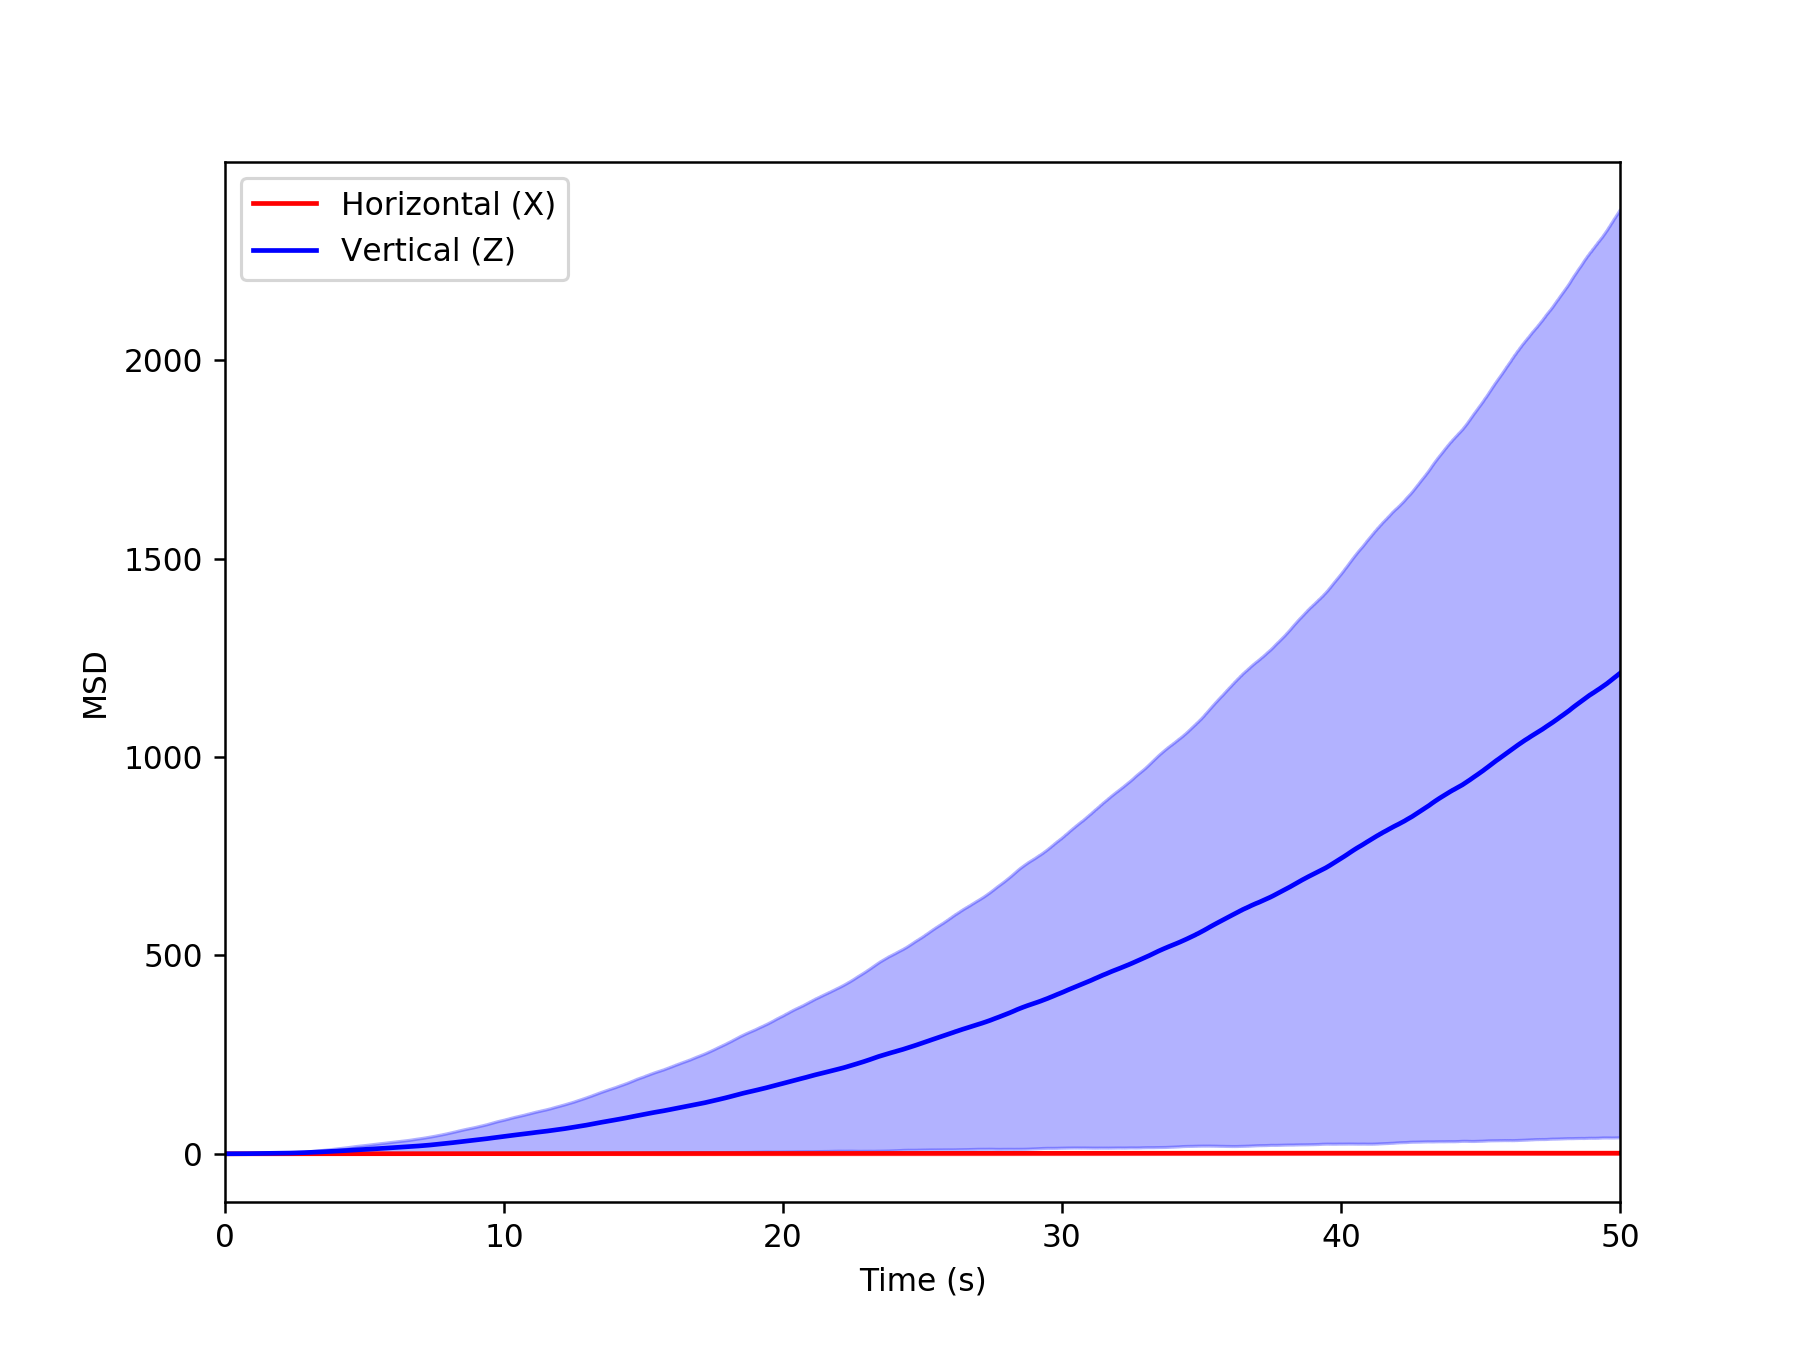

<IPython.core.display.Javascript object>


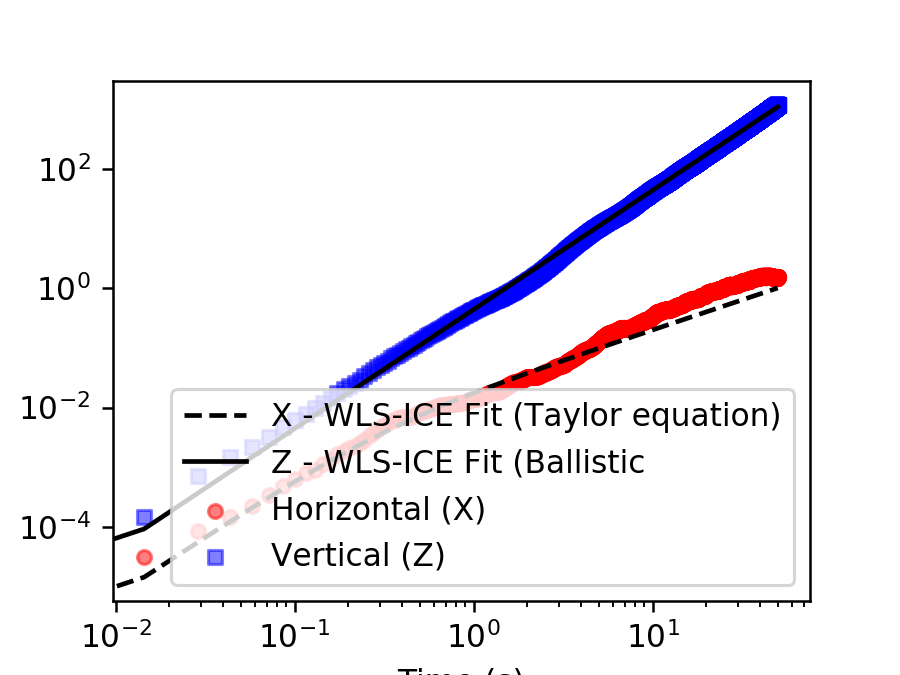

In [80]:
# Plot the MSD

msd1.plotMSD(figname = 1, plot_fit= True, savefig = False)

In [32]:
import msdanalyzer
imp.reload(msdanalyzer)
Delays_Z, Slope_Z = msd1.computeLocalSlope(msd1.delaysCommon, msd1.MSD_Z)
Delays_X, Slope_X = msd1.computeLocalSlope(msd1.delaysCommon, msd1.MSD_X)

print(Delays_Z)
print(Slope_Z)
print(Slope_X)

Window size 5(s)
Window size 5(s)
[1.44508671e-02 1.01445087e+00 2.01445087e+00 3.01445087e+00
 4.01445087e+00 5.01445087e+00 6.01445087e+00 7.01445087e+00
 8.01445087e+00 9.01445087e+00 1.00144509e+01 1.10144509e+01
 1.20144509e+01 1.30144509e+01 1.40144509e+01 1.50144509e+01
 1.60144509e+01 1.70144509e+01 1.80144509e+01 1.90144509e+01
 2.00144509e+01 2.10144509e+01 2.20144509e+01 2.30144509e+01
 2.40144509e+01 2.50144509e+01 2.60144509e+01 2.70144509e+01
 2.80144509e+01 2.90144509e+01 3.00144509e+01 3.10144509e+01
 3.20144509e+01 3.30144509e+01 3.40144509e+01 3.50144509e+01
 3.60144509e+01 3.70144509e+01 3.80144509e+01 3.90144509e+01
 4.00144509e+01 4.10144509e+01 4.20144509e+01 4.30144509e+01
 4.40144509e+01]
[1.89387857 2.17545736 2.22582114 2.0192042  1.93796176 2.01636148
 2.13090142 2.11676446 2.01477187 1.9887314  2.02087508 2.08218768
 2.07181272 2.00719562 2.01030372 2.04003581 2.08691036 2.07369992
 2.01218069 2.02469047 2.03170472 2.07029377 2.08110864 2.03168577
 2.0515186

<IPython.core.display.Javascript object>


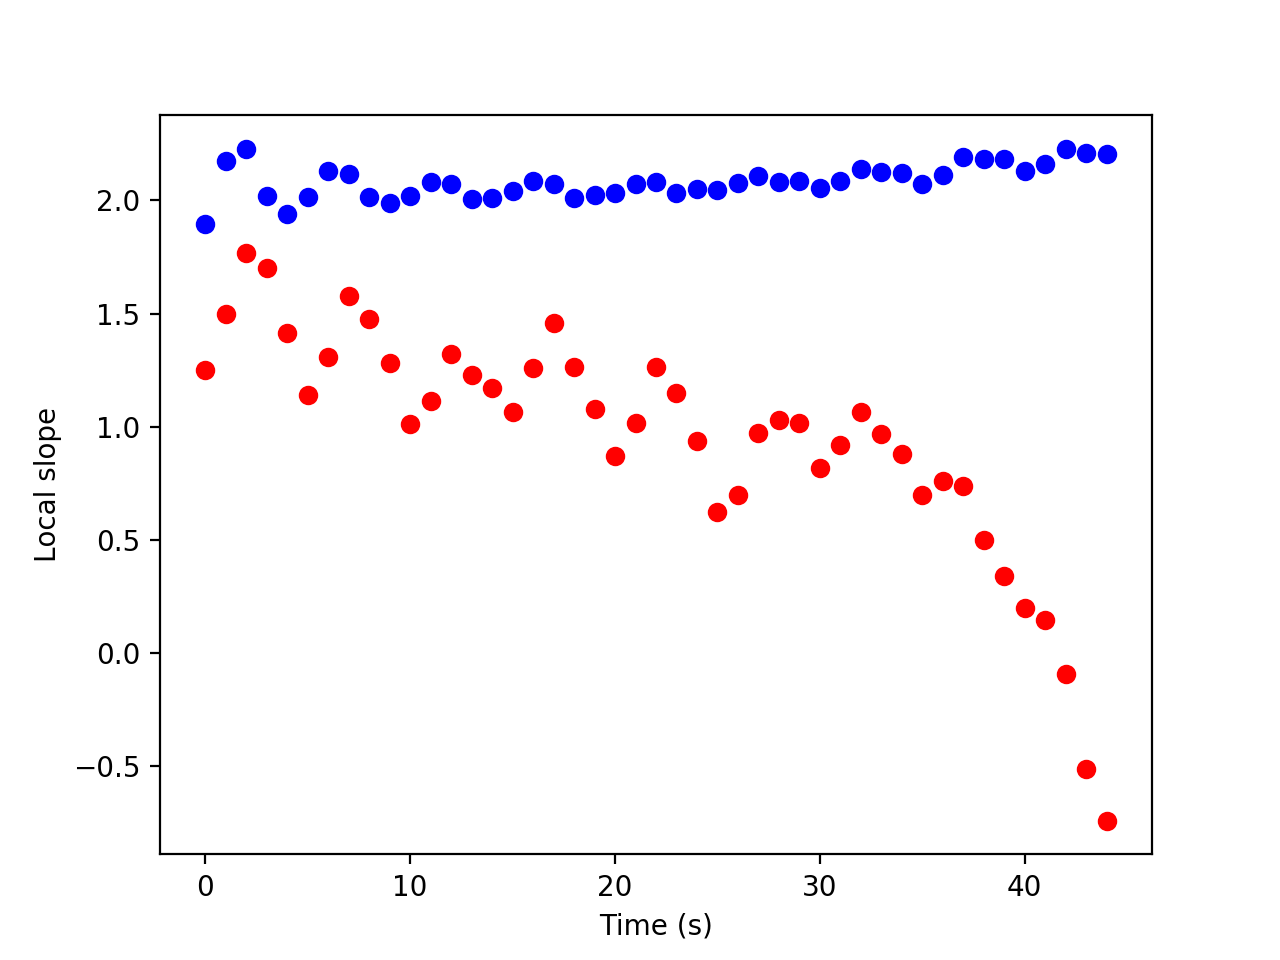

In [31]:
plt.figure()
plt.plot(Delays_X, Slope_X, 'ro')
plt.plot(Delays_Z, Slope_Z, 'bo')
plt.xlabel('Time (s)')
plt.ylabel('Local slope')
plt.show()

TypeError: list indices must be integers or slices, not tuple